In [31]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2019-12-19criteria_resnet18.mdl'
# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


In [32]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/train.csv')

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/val.csv')

    def __getitem__(self, index):

        #print(self.df['ID'])
        ID = self.df['ID'].iloc[[index]]
        n_sources = self.df['n_sources'].iloc[[index]]
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        mag_eff = self.df['mag_eff'].iloc[[index]]
        n_source_im = self.df['n_source_im'].iloc[[index]]
        print("mag_eff, n_source_im:", mag_eff.values[0], n_source_im.values[0])
        if mag_eff.values[0] < 1.2 or np.isnan(mag_eff.values[0]):
            criteria = 0.
        elif mag_eff.values[0] >= 2.0:
            criteria = 1.
        else:
            criteria = 0.5
        #print("criteria", criteria)
        #if
        #criteria = 1
        # filepath = "/media/joshua/HDD_fun2/Public/EUC_Y/imageEUC_Y-" + str(ID.values[0]) + ".fits"
        # lens_data = fits.open(filepath)
        # img = lens_data[0].data
        image = np.zeros((4, 224, 224))
        try:
            for i, channel in enumerate(channel_names):

                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img *= 10e8
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
        except:
            print("error", ID)
            pass



        # if self.transform is not None:
        #     image = self.transform(image)

        
        return image, ID.values[0], criteria, mag_eff.values[0]  #, n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]


In [33]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

mag_eff, n_source_im: 2.91765 1
______
mag_eff, n_source_im: 1.6828400000000001 1
______
mag_eff, n_source_im: 1.6281299999999999 1
______
mag_eff, n_source_im: 1.9648400000000001 2
______
mag_eff, n_source_im: 4.225569999999999 2
criteria (ground truth) 1.0
criteria prediction: 0.91092646


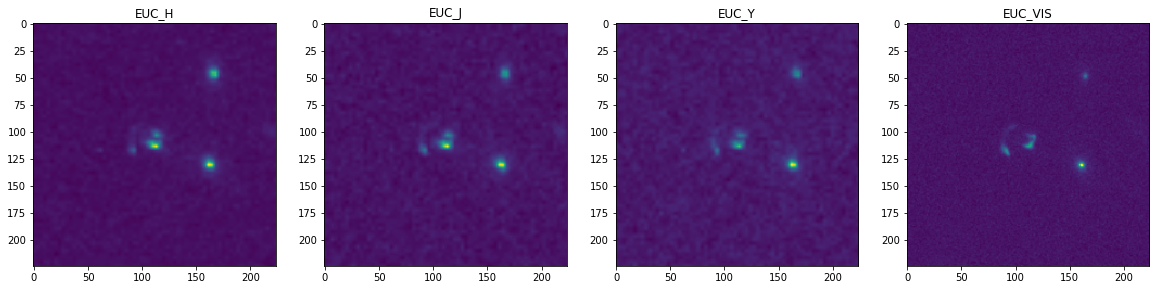

______
mag_eff, n_source_im: 10.6149 1
______
mag_eff, n_source_im: 2.95567 2
______
mag_eff, n_source_im: 2.9654 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 3.0673 2
______
mag_eff, n_source_im: 2.8039 3
______
mag_eff, n_source_im: 2.9715599999999998 2
______
mag_eff, n_source_im: 3.3233099999999998 0
______
mag_eff, n_source_im: 3.0537 2
criteria (ground truth) 1.0
criteria prediction: 0.89610374


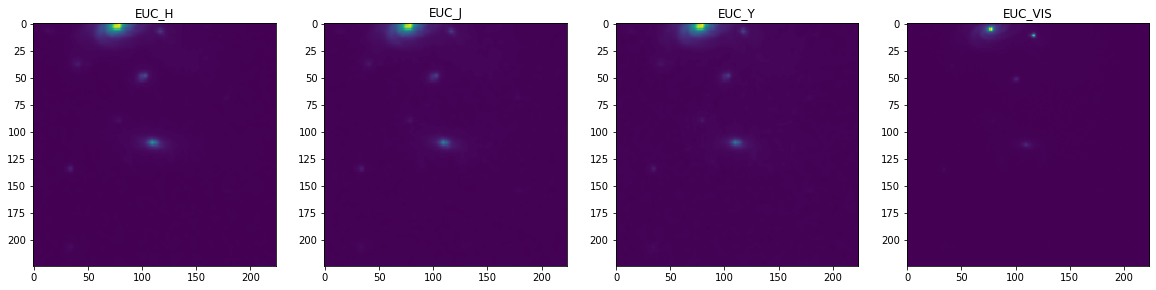

______
mag_eff, n_source_im: 2.50636 1
______
mag_eff, n_source_im: 2.8559400000000004 1
______
mag_eff, n_source_im: 2.73107 4
______
mag_eff, n_source_im: 2.2473099999999997 2
______
mag_eff, n_source_im: 1.21404 2
______
mag_eff, n_source_im: 1.70512 1
______
mag_eff, n_source_im: 1.53652 1
______
mag_eff, n_source_im: 3.8535800000000004 2
criteria (ground truth) 1.0
criteria prediction: 0.8817438


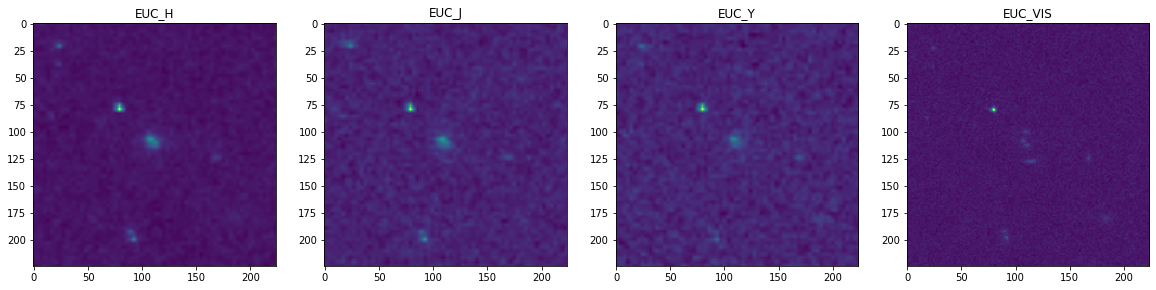

______
mag_eff, n_source_im: 1.6716900000000001 1
______
mag_eff, n_source_im: 0.991149 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.6452099999999998 1
______
mag_eff, n_source_im: 1.9087599999999998 0
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.66736 1
______
mag_eff, n_source_im: 3.2507 1
______
mag_eff, n_source_im: 7.12027 1
criteria (ground truth) 1.0
criteria prediction: 0.87764764


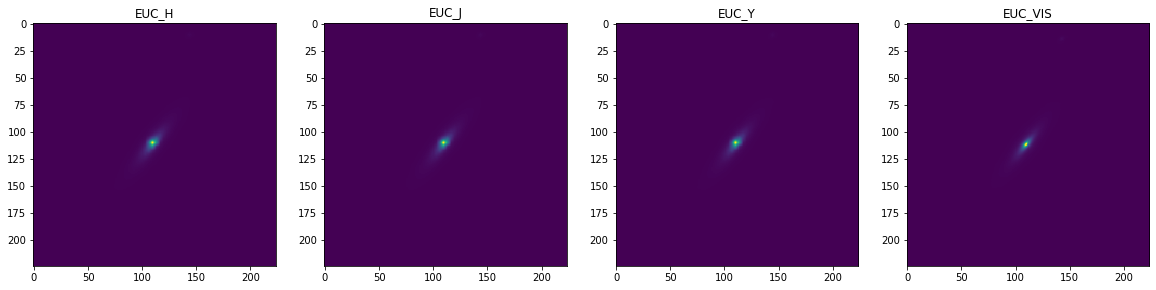

______
mag_eff, n_source_im: 3.08133 1
______
mag_eff, n_source_im: 2.37468 1
______
mag_eff, n_source_im: 1.4127 2
______
mag_eff, n_source_im: 2.16882 1
______
mag_eff, n_source_im: 1.96124 2
______
mag_eff, n_source_im: 3.2923400000000003 1
______
mag_eff, n_source_im: 8.78716 1
criteria (ground truth) 1.0
criteria prediction: 0.96019334


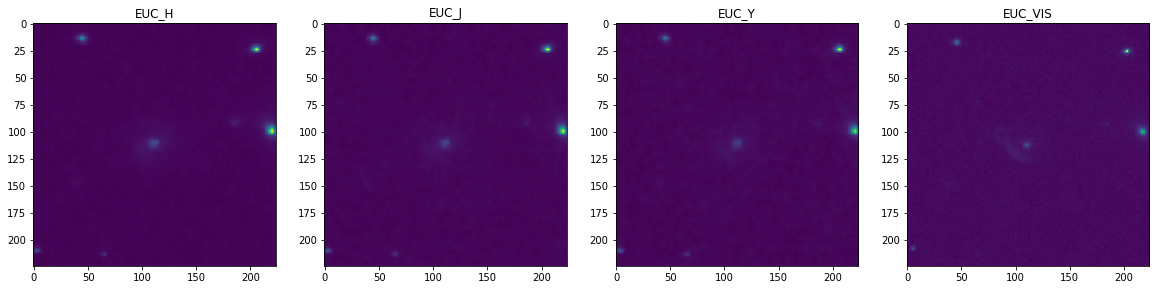

______
mag_eff, n_source_im: 5.36909 2
______
mag_eff, n_source_im: 1.55112 2
criteria (ground truth) 0.5
criteria prediction: 0.8793226


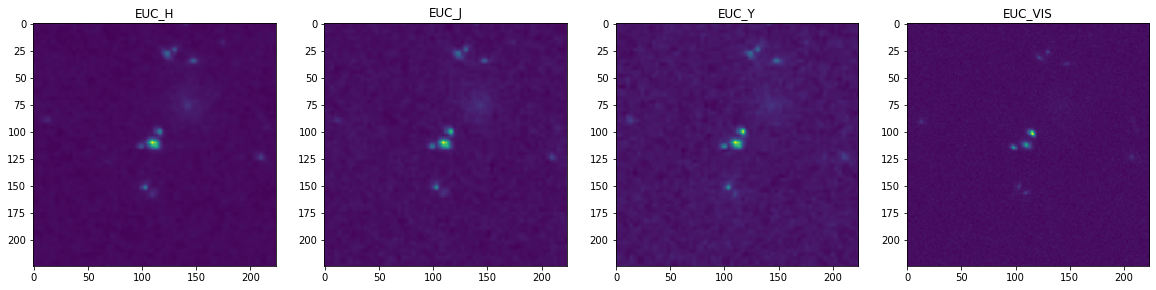

______
mag_eff, n_source_im: 8.73255 1
criteria (ground truth) 1.0
criteria prediction: 0.86598325


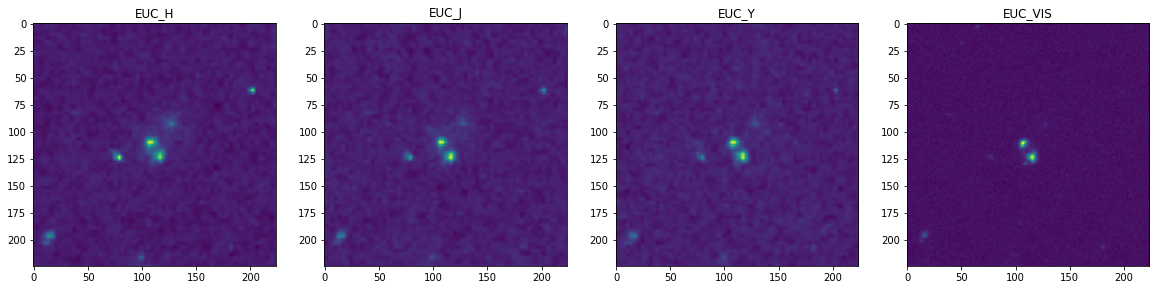

______
mag_eff, n_source_im: 2.61835 1
______
mag_eff, n_source_im: 2.0417099999999997 2
______
mag_eff, n_source_im: 2.86289 1
______
mag_eff, n_source_im: 2.1543200000000002 2
______
mag_eff, n_source_im: 2.3412599999999997 2
______
mag_eff, n_source_im: 2.30551 0
______
mag_eff, n_source_im: 4.53834 2
______
mag_eff, n_source_im: 2.2820099999999996 1
______
mag_eff, n_source_im: 1.57336 0
______
mag_eff, n_source_im: 5.23166 1
______
mag_eff, n_source_im: 3.2587900000000003 2
criteria (ground truth) 1.0
criteria prediction: 0.8741603


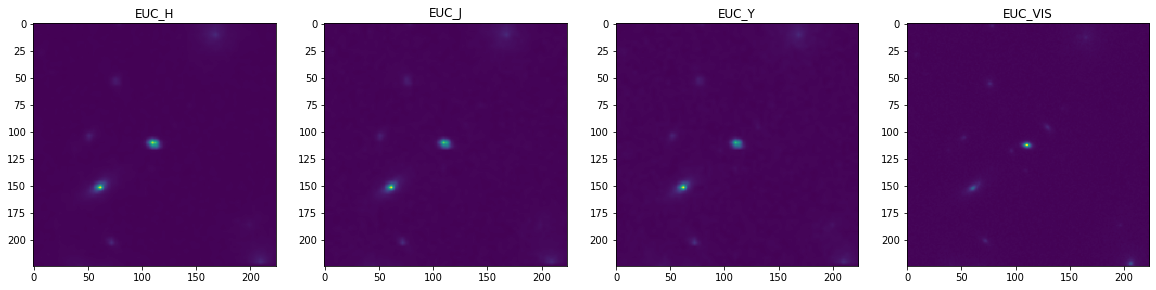

______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.0104 1
______
mag_eff, n_source_im: 2.12426 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.7351900000000002 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.83946 2
______
mag_eff, n_source_im: 2.06663 1
______
mag_eff, n_source_im: 3.73944 1
______
mag_eff, n_source_im: 1.7485099999999998 1
criteria (ground truth) 0.5
criteria prediction: 0.8632382


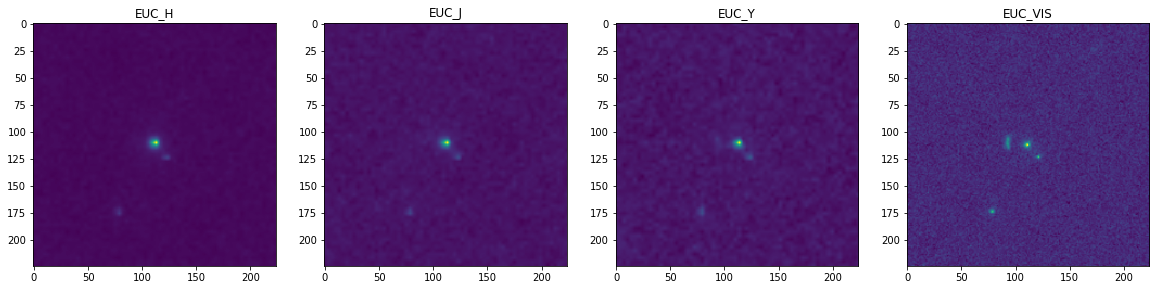

______
mag_eff, n_source_im: 1.72606 1
______
mag_eff, n_source_im: 3.0117599999999998 1
______
mag_eff, n_source_im: 3.48005 2
______
mag_eff, n_source_im: 10.0491 1
______
mag_eff, n_source_im: 9.04106 2
criteria (ground truth) 1.0
criteria prediction: 0.89536697


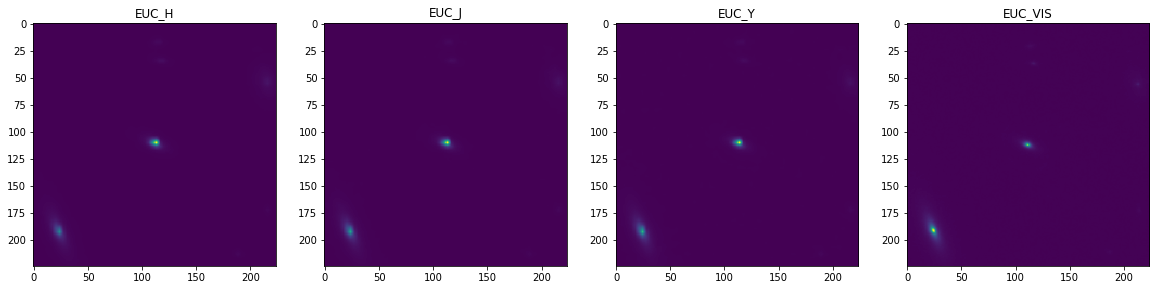

______
mag_eff, n_source_im: 1.8719700000000001 1
______
mag_eff, n_source_im: 1.9740099999999998 2
______
mag_eff, n_source_im: 1.92629 2
______
mag_eff, n_source_im: 1.94208 2
______
mag_eff, n_source_im: 3.7357 1
______
mag_eff, n_source_im: 2.83637 1
______
mag_eff, n_source_im: 2.66086 0
______
mag_eff, n_source_im: 1.61628 1
______
mag_eff, n_source_im: 3.1744 1
______
mag_eff, n_source_im: 4.79999 2
______
mag_eff, n_source_im: 3.2178400000000003 2
______
mag_eff, n_source_im: 3.02968 2
______
mag_eff, n_source_im: 2.29925 2
______
mag_eff, n_source_im: 2.81351 0
______
mag_eff, n_source_im: 2.40992 2
______
mag_eff, n_source_im: 2.53328 2
______
mag_eff, n_source_im: 2.22515 2
______
mag_eff, n_source_im: 1.27075 2
______
mag_eff, n_source_im: 2.30022 2
______
mag_eff, n_source_im: 2.0287 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 3.03954 2
criteria (ground truth) 1.0
criteria prediction: 0.9015836


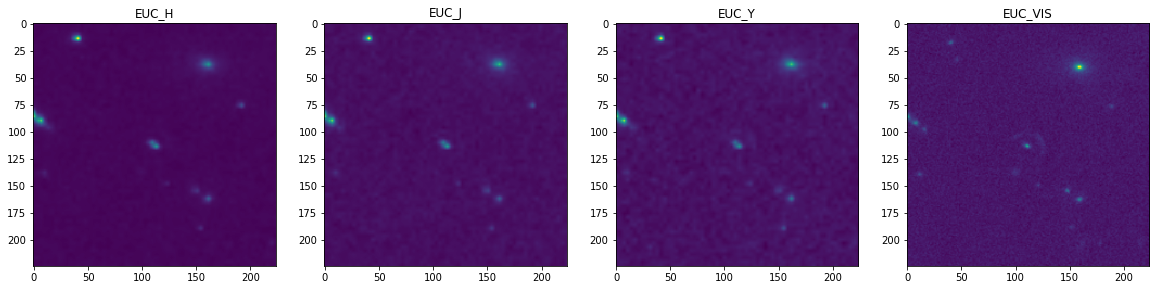

______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.16696 0
______
mag_eff, n_source_im: 2.07947 1
______
mag_eff, n_source_im: 1.41585 2
______
mag_eff, n_source_im: 5.296069999999999 3
______
mag_eff, n_source_im: 1.6174600000000001 1
______
mag_eff, n_source_im: 1.48405 2
______
mag_eff, n_source_im: 2.6069299999999997 2
______
mag_eff, n_source_im: 1.4870700000000001 0
criteria (ground truth) 0.5
criteria prediction: 0.89748824


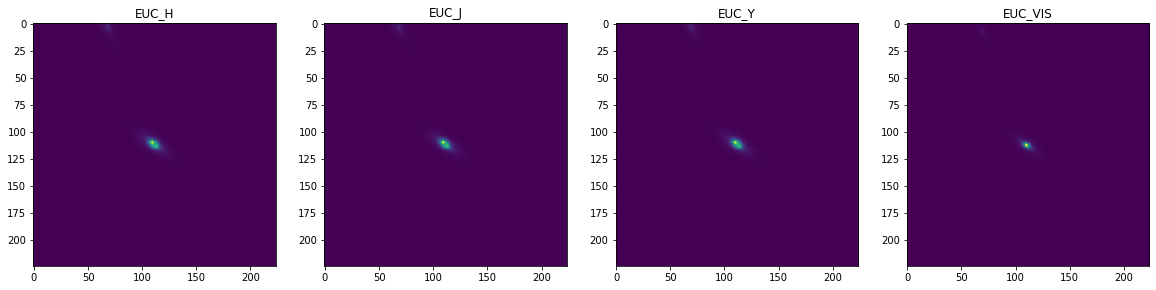

______
mag_eff, n_source_im: 6.73722 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.8139299999999998 1
______
mag_eff, n_source_im: 1.9993599999999998 1
______
mag_eff, n_source_im: 2.43672 1
______
mag_eff, n_source_im: 1.48219 0
______
mag_eff, n_source_im: 3.06049 1
______
mag_eff, n_source_im: 1.5044799999999998 2
______
mag_eff, n_source_im: 1.0722 2
______
mag_eff, n_source_im: 2.40262 1
______
mag_eff, n_source_im: 3.23336 1
______
mag_eff, n_source_im: 2.4698700000000002 2
______
mag_eff, n_source_im: 2.0371200000000003 1
______
mag_eff, n_source_im: 3.60854 1
______
mag_eff, n_source_im: 2.15988 1
______
mag_eff, n_source_im: 2.05773 1
______
mag_eff, n_source_im: 0.934699 1
______
mag_eff, n_source_im: 2.02303 0
______
mag_eff, n_source_im: 9.76956 5
criteria (ground truth) 1.0
criteria prediction: 0.8956416


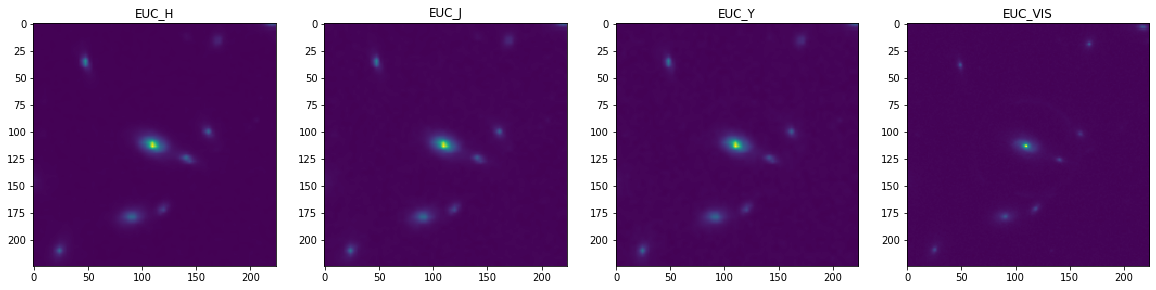

______
mag_eff, n_source_im: 2.57007 1
______
mag_eff, n_source_im: 4.84002 2
criteria (ground truth) 1.0
criteria prediction: 0.8919339


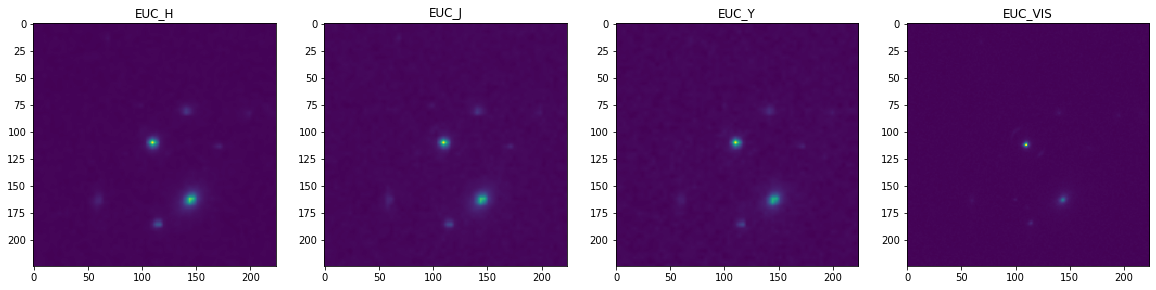

______
mag_eff, n_source_im: 2.4123 2
______
mag_eff, n_source_im: 2.16919 1
______
mag_eff, n_source_im: 2.6991 3
criteria (ground truth) 1.0
criteria prediction: 0.88438255


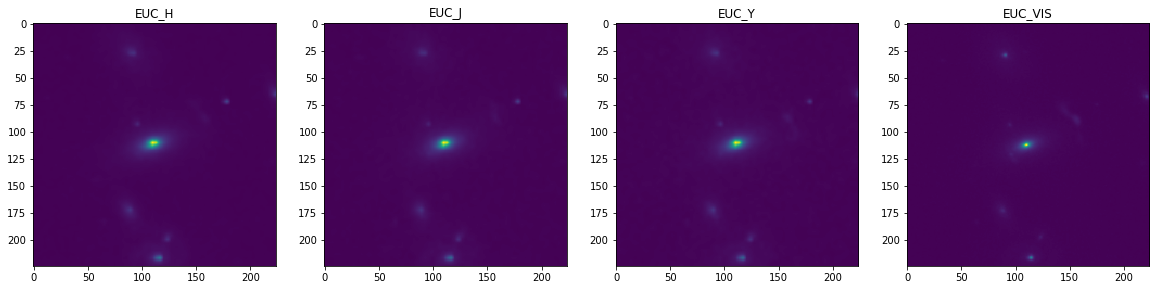

______
mag_eff, n_source_im: 1.87906 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.37658 1
______
mag_eff, n_source_im: 2.2673 2
______
mag_eff, n_source_im: 1.3525200000000002 2
______
mag_eff, n_source_im: 3.5144699999999998 5
______
mag_eff, n_source_im: 1.7069999999999999 2
______
mag_eff, n_source_im: 3.6333900000000003 1
______
mag_eff, n_source_im: 2.1737900000000003 0
______
mag_eff, n_source_im: 1.58246 1
______
mag_eff, n_source_im: 1.5156100000000001 1
______
mag_eff, n_source_im: 6.5959699999999994 1
criteria (ground truth) 1.0
criteria prediction: 0.9812144


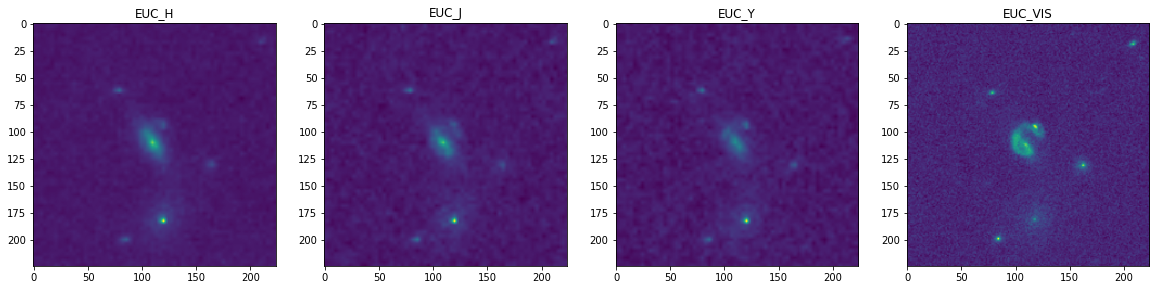

______
mag_eff, n_source_im: 5.8368 2
criteria (ground truth) 1.0
criteria prediction: 0.9605225


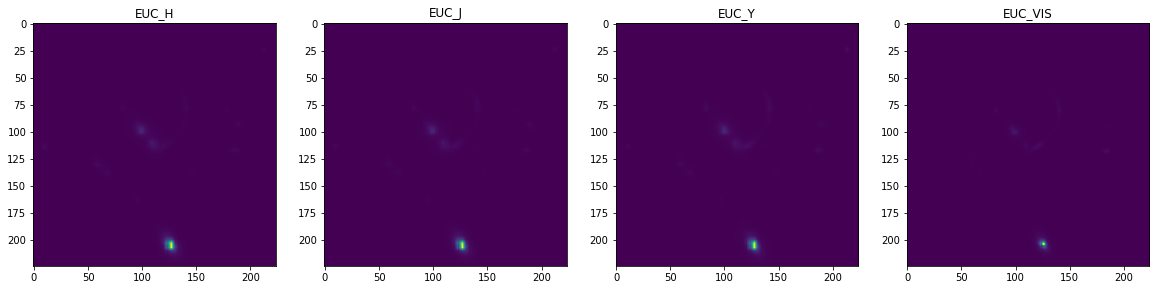

______
mag_eff, n_source_im: 1.2076 2
______
mag_eff, n_source_im: 6.058 2
criteria (ground truth) 1.0
criteria prediction: 0.9302413


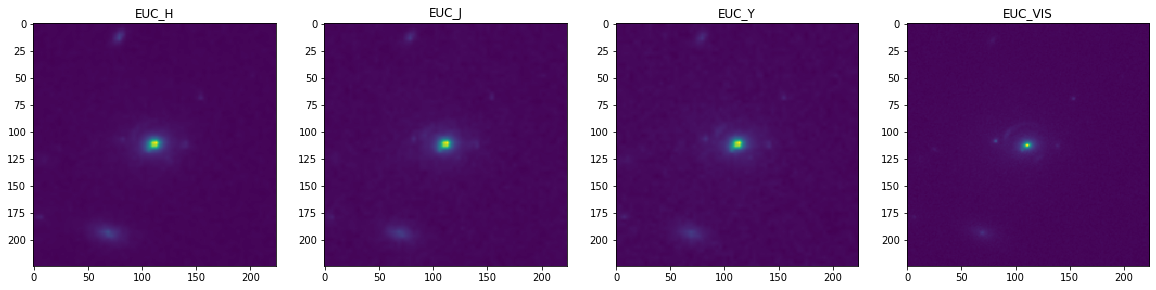

______
mag_eff, n_source_im: 2.31848 1
______
mag_eff, n_source_im: 8.41803 0
______
mag_eff, n_source_im: 2.0991299999999997 2
______
mag_eff, n_source_im: 1.0337100000000001 2
______
mag_eff, n_source_im: 1.63946 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 0.518572 0
______
mag_eff, n_source_im: 0.963454 1
______
mag_eff, n_source_im: 3.12322 2
______
mag_eff, n_source_im: 5.2531099999999995 2
______
mag_eff, n_source_im: 1.4712399999999999 0
______
mag_eff, n_source_im: 1.44181 2
______
mag_eff, n_source_im: 1.54465 0
______
mag_eff, n_source_im: 1.87897 2
______
mag_eff, n_source_im: 5.05856 2
______
mag_eff, n_source_im: 1.45838 1
______
mag_eff, n_source_im: 3.78745 1
______
mag_eff, n_source_im: 4.10778 6
criteria (ground truth) 1.0
criteria prediction: 0.9370733


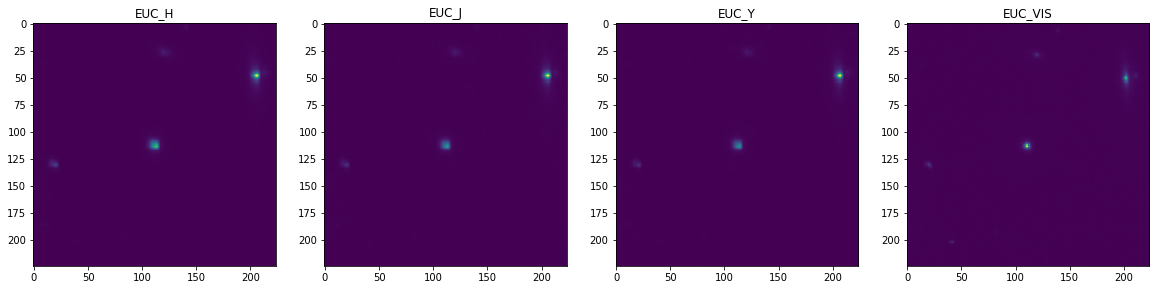

______
mag_eff, n_source_im: 1.7416099999999999 2
______
mag_eff, n_source_im: 2.0948599999999997 2
______
mag_eff, n_source_im: 2.2469200000000003 2
______
mag_eff, n_source_im: 1.55332 3
______
mag_eff, n_source_im: 2.68329 1
______
mag_eff, n_source_im: 2.53048 1
______
mag_eff, n_source_im: 2.14341 1
______
mag_eff, n_source_im: 2.38801 2
______
mag_eff, n_source_im: 1.7443099999999998 2
criteria (ground truth) 0.5
criteria prediction: 0.8772969


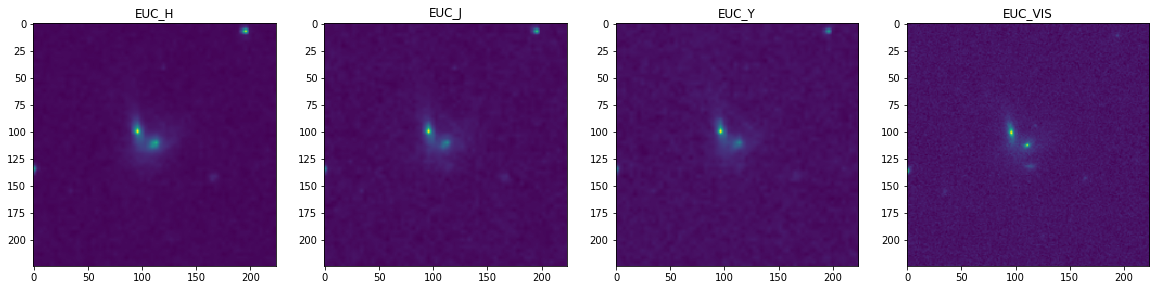

______
mag_eff, n_source_im: 1.87756 1
______
mag_eff, n_source_im: 3.7193300000000002 2
______
mag_eff, n_source_im: 5.2763300000000015 1
______
mag_eff, n_source_im: 4.976719999999999 0
______
mag_eff, n_source_im: 3.6038300000000003 0
______
mag_eff, n_source_im: 3.19348 1
______
mag_eff, n_source_im: 1.61022 2
______
mag_eff, n_source_im: 2.49159 1
______
mag_eff, n_source_im: 3.7058699999999996 2
______
mag_eff, n_source_im: 1.65255 0
______
mag_eff, n_source_im: 3.72468 0
______
mag_eff, n_source_im: 4.1913800000000005 2
______
mag_eff, n_source_im: 1.8648799999999999 1
______
mag_eff, n_source_im: 1.81197 1
______
mag_eff, n_source_im: 12.478 1
criteria (ground truth) 1.0
criteria prediction: 0.96925306


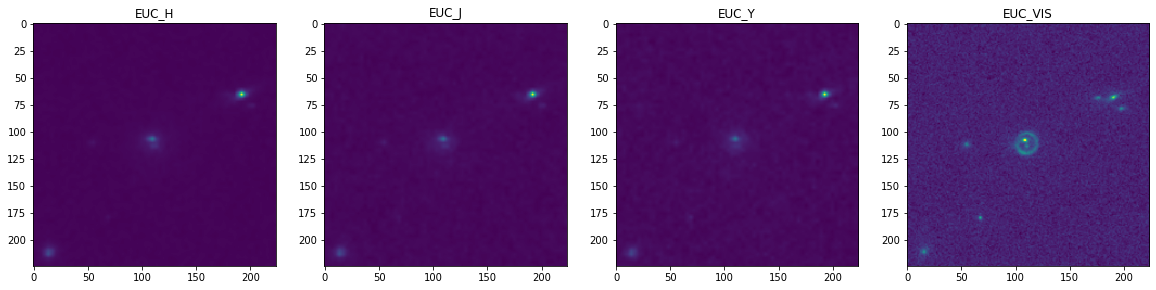

______
mag_eff, n_source_im: 1.8927900000000002 2
______
mag_eff, n_source_im: 2.5781 2
criteria (ground truth) 1.0
criteria prediction: 0.91398346


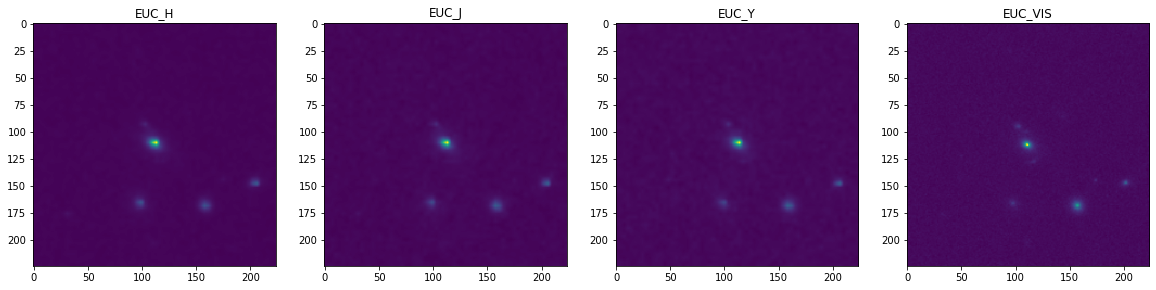

______
mag_eff, n_source_im: 2.5149 1
______
mag_eff, n_source_im: 1.95124 2
______
mag_eff, n_source_im: 1.9441099999999998 1
______
mag_eff, n_source_im: 1.5411700000000002 1
______
mag_eff, n_source_im: 5.5372 2
______
mag_eff, n_source_im: 5.106269999999999 0
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.2244599999999997 2
______
mag_eff, n_source_im: 2.18928 1
______
mag_eff, n_source_im: 2.64472 1
______
mag_eff, n_source_im: 3.83049 2
______
mag_eff, n_source_im: 1.99665 1
______
mag_eff, n_source_im: 1.50468 1
______
mag_eff, n_source_im: 1.69003 2
______
mag_eff, n_source_im: 2.21866 1
______
mag_eff, n_source_im: 4.79151 2
criteria (ground truth) 1.0
criteria prediction: 0.96669155


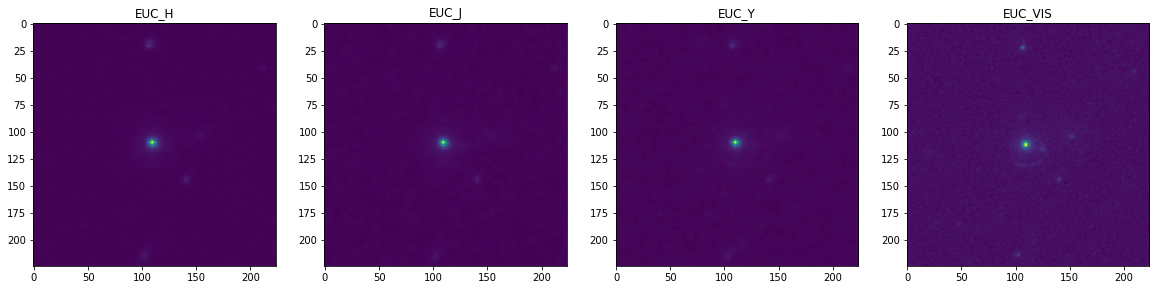

______
mag_eff, n_source_im: 1.5665799999999999 1
______
mag_eff, n_source_im: 1.9343099999999998 2
______
mag_eff, n_source_im: 0.702379 2
______
mag_eff, n_source_im: 1.8245799999999999 2
______
mag_eff, n_source_im: 3.18498 2
______
mag_eff, n_source_im: 1.5965 1
______
mag_eff, n_source_im: 1.41455 2
______
mag_eff, n_source_im: 1.2171299999999998 2
______
mag_eff, n_source_im: 3.7663599999999997 2
criteria (ground truth) 1.0
criteria prediction: 0.892209


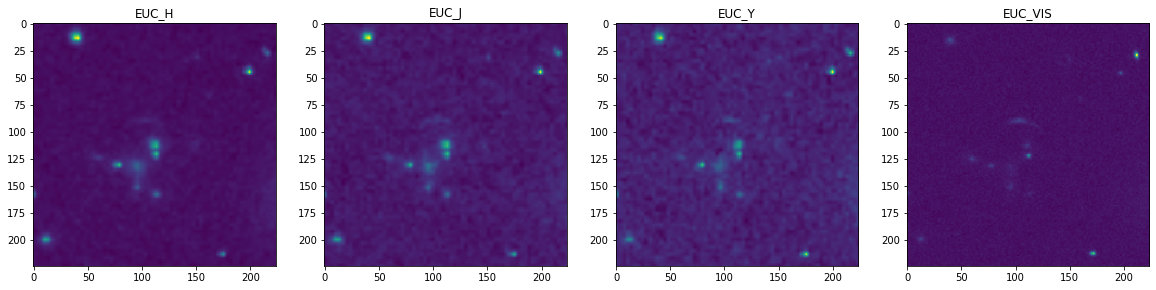

______
mag_eff, n_source_im: 3.16398 3
criteria (ground truth) 1.0
criteria prediction: 0.88527656


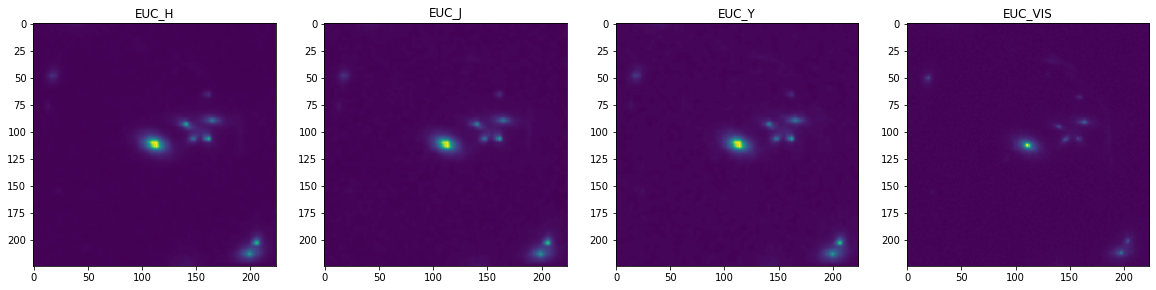

______
mag_eff, n_source_im: 2.32721 1
______
mag_eff, n_source_im: 2.72415 1
______
mag_eff, n_source_im: 4.41993 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 5.78688 1
______
mag_eff, n_source_im: 2.57631 2
______
mag_eff, n_source_im: 5.95305 2
______
mag_eff, n_source_im: 2.44198 2
______
mag_eff, n_source_im: 1.2895299999999998 2
______
mag_eff, n_source_im: 2.1841 1
______
mag_eff, n_source_im: 5.9705900000000005 2
______
mag_eff, n_source_im: 2.77507 2
criteria (ground truth) 1.0
criteria prediction: 0.9119577


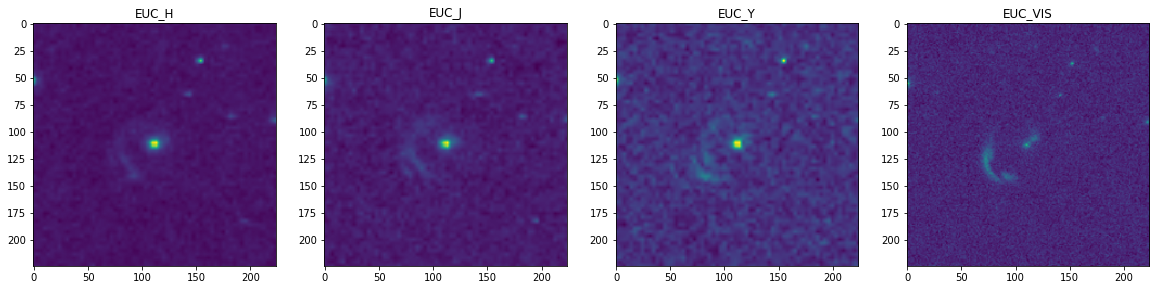

______
mag_eff, n_source_im: 6.43648 1
______
mag_eff, n_source_im: 3.84378 2
______
mag_eff, n_source_im: 2.1892 1
______
mag_eff, n_source_im: 4.7615099999999995 3
criteria (ground truth) 1.0
criteria prediction: 0.96175534


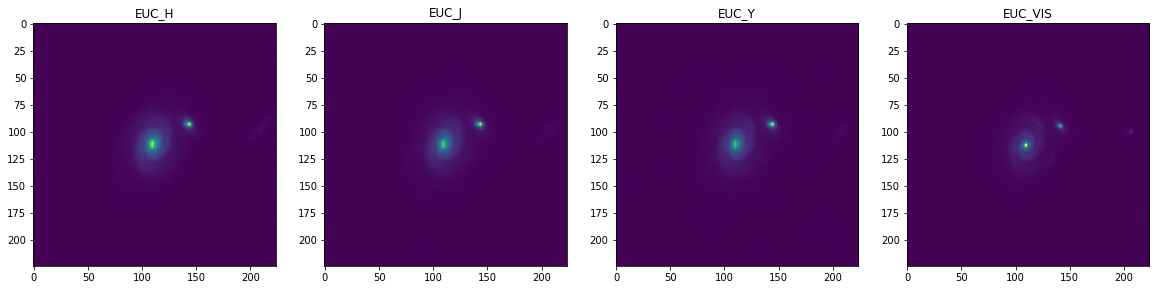

______
mag_eff, n_source_im: 2.46345 4
______
mag_eff, n_source_im: 2.57841 2
criteria (ground truth) 1.0
criteria prediction: 0.9482569


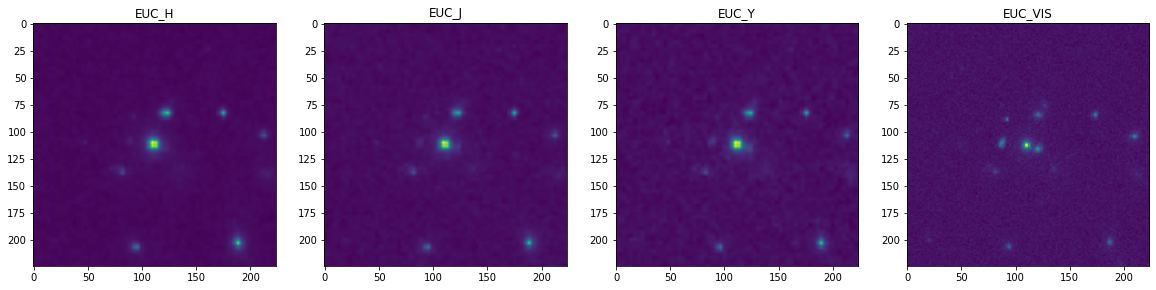

______
mag_eff, n_source_im: 2.4236 2
______
mag_eff, n_source_im: 1.99125 2
______
mag_eff, n_source_im: 1.27931 1
______
mag_eff, n_source_im: 4.1632 2
criteria (ground truth) 1.0
criteria prediction: 0.88594216


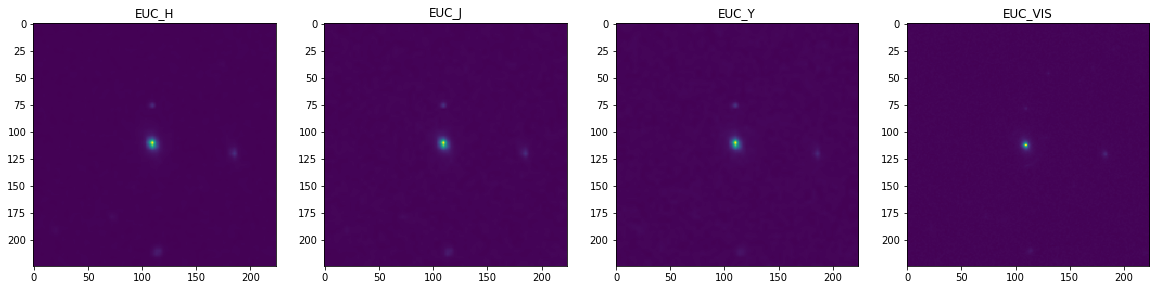

______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.08692 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.8830200000000001 2
______
mag_eff, n_source_im: 2.4605200000000003 1
______
mag_eff, n_source_im: 1.50955 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.4143299999999999 1
______
mag_eff, n_source_im: 2.13236 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 3.31154 2
criteria (ground truth) 1.0
criteria prediction: 0.90697575


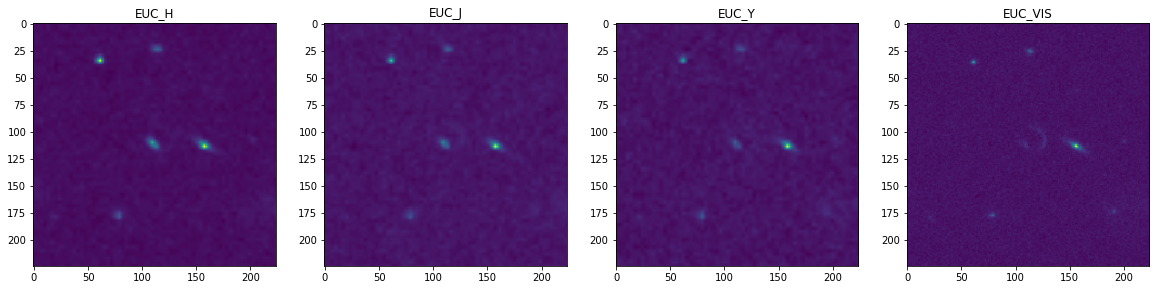

______
mag_eff, n_source_im: 3.56585 2
______
mag_eff, n_source_im: 2.4424 2
______
mag_eff, n_source_im: 3.5731900000000003 1
______
mag_eff, n_source_im: 1.24386 2
______
mag_eff, n_source_im: 1.55454 2
______
mag_eff, n_source_im: 1.53145 1
______
mag_eff, n_source_im: 3.2097 0
______
mag_eff, n_source_im: 2.13056 2
______
mag_eff, n_source_im: 1.6762099999999998 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 0.669392 0
______
mag_eff, n_source_im: 2.00577 1
______
mag_eff, n_source_im: 1.7291299999999998 2
______
mag_eff, n_source_im: 18.9829 2
criteria (ground truth) 1.0
criteria prediction: 0.8628397


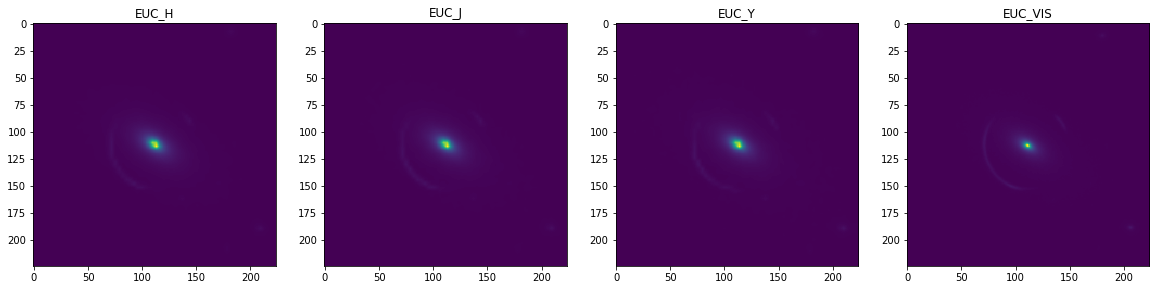

______
mag_eff, n_source_im: 1.51217 2
______
mag_eff, n_source_im: 1.1859 2
______
mag_eff, n_source_im: 2.06694 1
______
mag_eff, n_source_im: 1.6924299999999999 2
______
mag_eff, n_source_im: 4.70027 2
______
mag_eff, n_source_im: 7.2729 0
______
mag_eff, n_source_im: 0.390865 0
______
mag_eff, n_source_im: 1.68862 2
______
mag_eff, n_source_im: 10.0403 2
______
mag_eff, n_source_im: 1.8277900000000002 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.61563 2
______
mag_eff, n_source_im: 1.89162 2
criteria (ground truth) 0.5
criteria prediction: 0.9731809


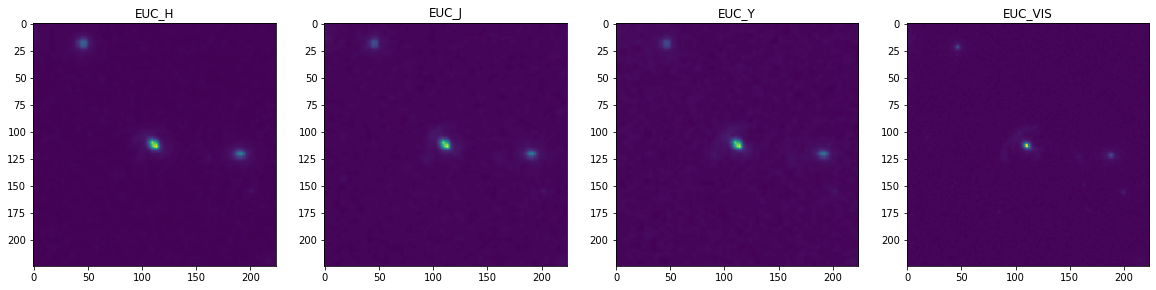

______
mag_eff, n_source_im: 3.96945 1
______
mag_eff, n_source_im: 1.23455 0
______
mag_eff, n_source_im: 1.78384 2
______
mag_eff, n_source_im: 4.62786 2
______
mag_eff, n_source_im: 1.235 1
______
mag_eff, n_source_im: 3.7678199999999995 1
______
mag_eff, n_source_im: 2.59827 2
______
mag_eff, n_source_im: 4.55272 2
criteria (ground truth) 1.0
criteria prediction: 0.86193275


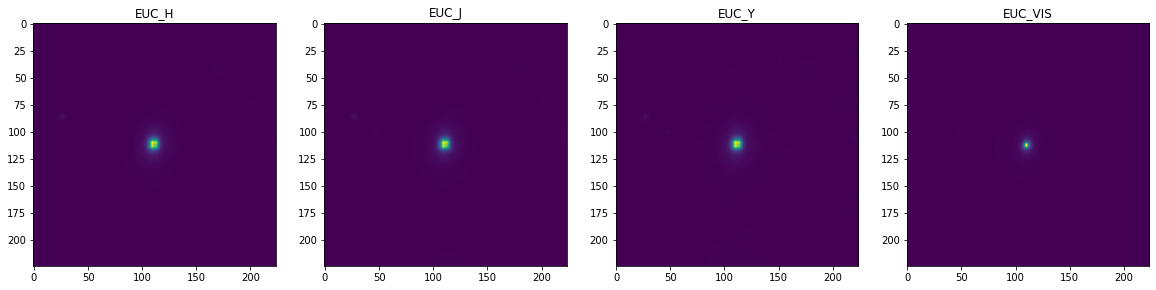

______
mag_eff, n_source_im: 3.15518 3
______
mag_eff, n_source_im: 1.31934 2
______
mag_eff, n_source_im: 1.2038200000000001 2
______
mag_eff, n_source_im: 2.4027 1
______
mag_eff, n_source_im: 2.6891599999999998 1
______
mag_eff, n_source_im: 2.01589 1
______
mag_eff, n_source_im: 4.32566 1
criteria (ground truth) 1.0
criteria prediction: 0.960572


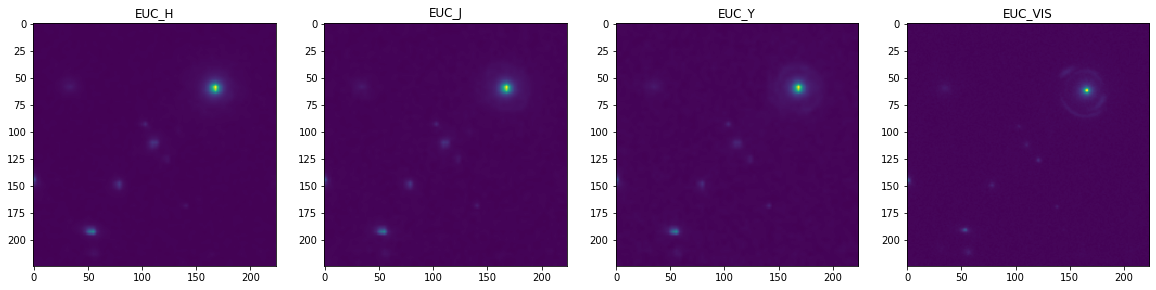

______
mag_eff, n_source_im: 1.67467 1
______
mag_eff, n_source_im: 4.74865 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 1.60014 1
______
mag_eff, n_source_im: 2.22511 0
______
mag_eff, n_source_im: 2.63278 1
______
mag_eff, n_source_im: 2.18378 1
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: 2.84525 2
______
mag_eff, n_source_im: 2.21751 1
______
mag_eff, n_source_im: 4.61291 2
______
mag_eff, n_source_im: 10.866 2
criteria (ground truth) 1.0
criteria prediction: 0.98617816


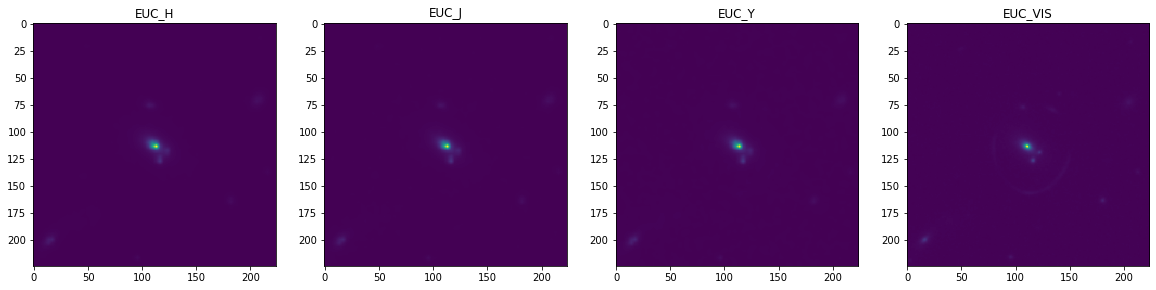

______
mag_eff, n_source_im: 0.9760909999999999 1
______
mag_eff, n_source_im: 3.59789 3
______
mag_eff, n_source_im: 9.1997 1
criteria (ground truth) 1.0
criteria prediction: 0.98754233


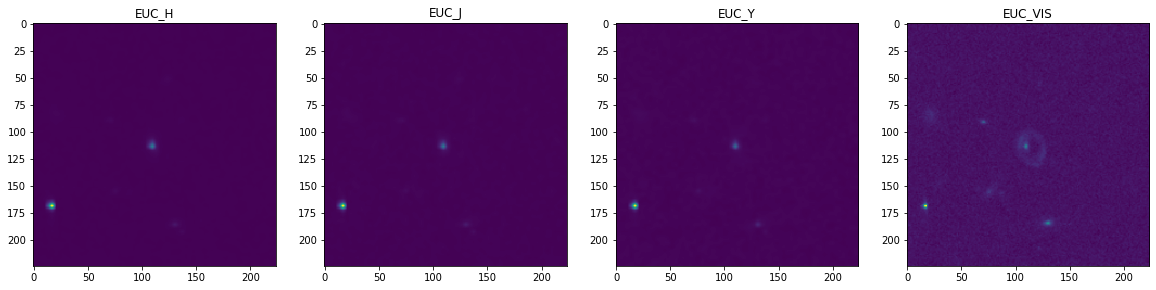

______
mag_eff, n_source_im: 2.7770799999999998 2
______
mag_eff, n_source_im: 2.20018 2
______
mag_eff, n_source_im: nan 0
______
mag_eff, n_source_im: nan 0
______


In [34]:
net.cuda()




for batch_idx, (data, ID, criteria, mag_eff) in enumerate(test_loader):
    data, target = data.float(), criteria.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] > 0.85:
    #if mag_eff[0] > 4.8:    
        print("criteria (ground truth)", target.cpu().numpy()[0][0])
        print("criteria prediction:", output.data.cpu().numpy()[0][0])
        
        image = np.zeros((4, 224, 224))
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        plt.figure(figsize=(20, 5))
        for i, channel in enumerate(channel_names):
            filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
            lens_data = fits.open(filepath)
            img = lens_data[0].data
            img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
            image[i, :, :] += img_channel_0
            plt.subplot(1, 4, i+ 1)
            plt.imshow(image[i, :, :])
            plt.title(channel)
        plt.show()
    print("______")

    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 300:
        break